<a href="https://colab.research.google.com/github/Jevaan21/intrusion-detection-dl/blob/main/intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Android Malware Detection


In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Wget

In [2]:
!wget https://raw.githubusercontent.com/Jevaan21/intrusion-detection-dl/main/drebin-215-dataset-5560malware-9476-benign.csv


--2025-08-05 09:33:13--  https://raw.githubusercontent.com/Jevaan21/intrusion-detection-dl/main/drebin-215-dataset-5560malware-9476-benign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6514978 (6.2M) [text/plain]
Saving to: ‘drebin-215-dataset-5560malware-9476-benign.csv’

drebin-215-dataset- 100%[===================>]   6.21M  --.-KB/s    in 0.06s   

2025-08-05 09:33:13 (107 MB/s) - ‘drebin-215-dataset-5560malware-9476-benign.csv’ saved [6514978/6514978]



In [3]:
import pandas as pd

data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")
print("Total missing values:", data.isna().sum().sum())
data.head()


/tmp/ipython-input-1218324613.py:3: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("drebin-215-dataset-5560malware-9476-benign.csv")


Total missing values: 0


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


The output class contains categorical values 'B' and 'S'. We have to encode them into integer values. The dataset contains some random characters like '?' and 'S'. We can set them to NULl and remove them using dropna()

In [6]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

classes, count = np.unique(data['class'], return_counts=True)
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes), classes)
data = data.replace(classes, lbl_enc.fit_transform(classes))

# Replace bad characters and drop missing rows
data = data.replace('[?,S]', np.nan, regex=True)
print("Total missing values : ", data.isna().sum().sum())
data.dropna(inplace=True)

# Convert everything to numeric
for c in data.columns:
    data[c] = pd.to_numeric(data[c])

data.head()


[0 1] [0 1]
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


[0 1] ['B' 'S']
Total missing values :  5


Since the data values belong to either 0 or 1, only label encoding of last column will be enough.

In [7]:
print("Total Features : ",len(data.columns)-1)


Total Features :  215


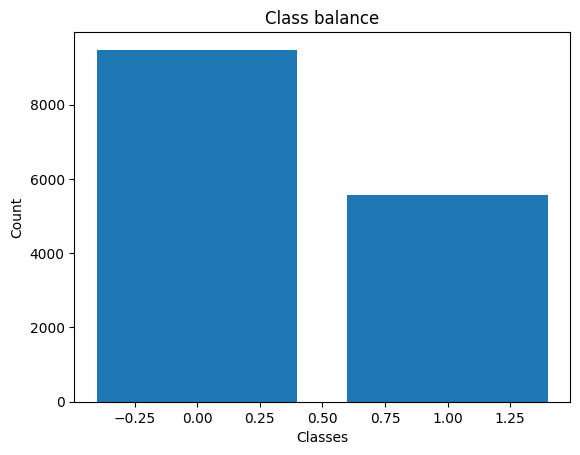

In [8]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [9]:
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)

In [10]:

print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


In [11]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024,)
Test Features :  (3007, 215)
Test labels :  (3007,)


In [12]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))

In [13]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024, 1)
Test Features :  (3007, 215)
Test labels :  (3007, 1)


In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(215, activation='relu', input_shape=(215,)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 215)            │        46,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        21,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,141 (266.18 KB)

 Trainable params: 68,141 (266.18 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = keras.optimizers.RMSprop(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:

ep=5

In [28]:

history = model.fit(train_x,
                    train_y,
                    validation_data = (test_x,test_y),
                    epochs = ep)


Epoch 1/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9341 - loss: 0.1722 - val_accuracy: 0.9790 - val_loss: 0.0648
Epoch 2/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 0.9810 - val_loss: 0.0583
Epoch 3/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0500 - val_accuracy: 0.9827 - val_loss: 0.0581
Epoch 4/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9894 - loss: 0.0386 - val_accuracy: 0.9844 - val_loss: 0.0610
Epoch 5/5
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0296 - val_accuracy: 0.9824 - val_loss: 0.0643


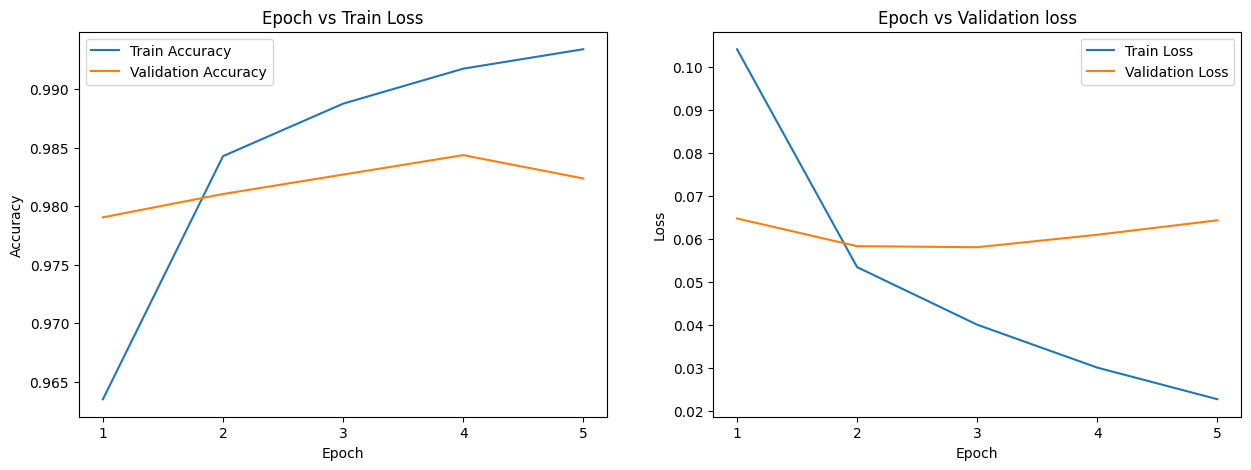

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot([str(i) for i in range(1,ep+1)],history.history['accuracy'],label="Train Accuracy")
plt.plot([str(i) for i in range(1,ep+1)],history.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Train Loss")

plt.subplot(1,2,2)
plt.plot([str(i) for i in range(1,ep+1)],history.history['loss'],label="Train Loss")
plt.plot([str(i) for i in range(1,ep+1)],history.history['val_loss'],label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Validation loss")

plt.show()

In [32]:
y_pred = model.predict(test_x)
for i in range(len(y_pred)):
    if y_pred[i] > (1-y_pred[i]):
        y_pred[i]=1
    else:
        y_pred[i]=0
print("Precision : ",precision_score(test_y,y_pred)*100)
print("Recall : ",recall_score(test_y,y_pred)*100)
print("F1 Score : ",f1_score(test_y,y_pred)*100)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision :  96.92442882249561
Recall :  98.39429081177519
F1 Score :  97.65382912793271


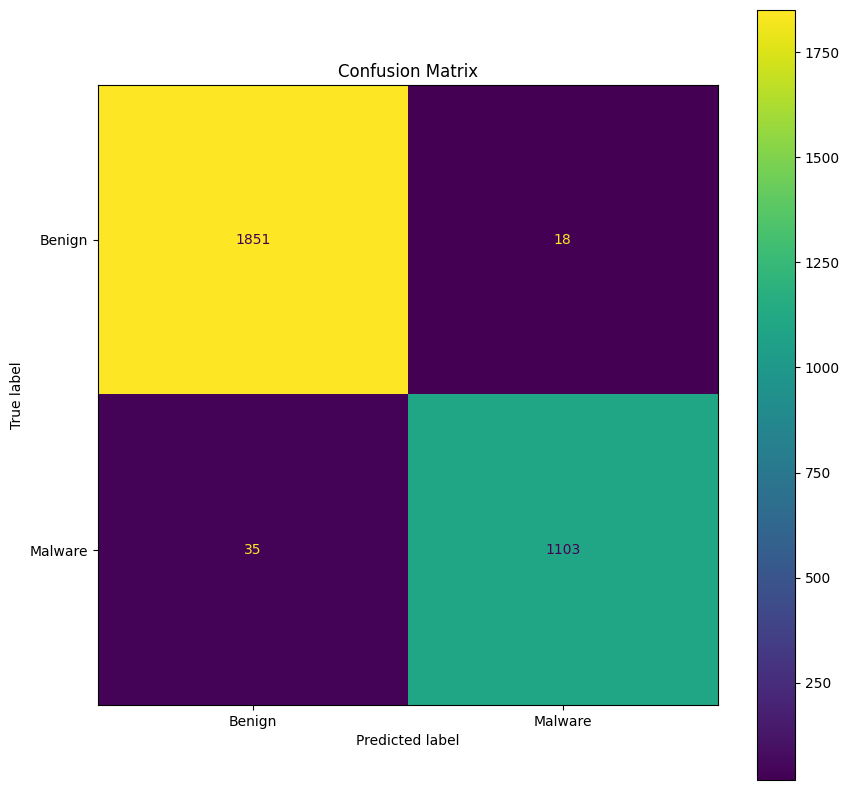

In [33]:
classes = ["Benign","Malware"]
cm = confusion_matrix(y_pred,test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()